In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
data = pd.read_csv("Churn_Modelling.csv")

In [3]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [5]:
# check for missing values (Nans)
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### OneHot Encoding of categorical variables

In [6]:
data = pd.get_dummies(data,prefix=['Geography'], columns = ['Geography'])
data = pd.get_dummies(data,prefix=['Gender'], columns = ['Gender'])

In [7]:
data

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,9997,15569892,Johnstone,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,9998,15584532,Liu,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,9999,15682355,Sabbatini,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [8]:
clean_data = data.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis = 1)

In [9]:
clean_data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1


In [10]:
X, y = clean_data.iloc[:, :13], data.iloc[:, -1]

In [11]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [13]:
X

array([[-0.32622142,  0.29351742, -1.04175968, ..., -0.57380915,
         1.09598752, -1.09598752],
       [-0.44003595,  0.19816383, -1.38753759, ...,  1.74273971,
         1.09598752, -1.09598752],
       [-1.53679418,  0.29351742,  1.03290776, ..., -0.57380915,
         1.09598752, -1.09598752],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -0.57380915,
         1.09598752, -1.09598752],
       [ 1.25683526,  0.29351742, -0.69598177, ..., -0.57380915,
        -0.91241915,  0.91241915],
       [ 1.46377078, -1.04143285, -0.35020386, ..., -0.57380915,
         1.09598752, -1.09598752]])

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [15]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [16]:
lr_predict = clf.predict(X_test)

In [18]:
from sklearn import metrics
metrics.accuracy_score(lr_predict, y_test)

1.0

In [19]:
cm = metrics.confusion_matrix(lr_predict, y_test)

In [20]:
cm

array([[ 897,    0],
       [   0, 1103]], dtype=int64)

<AxesSubplot:>

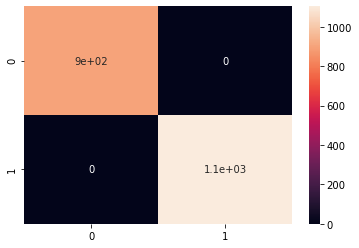

In [21]:
import seaborn as sns
sns.heatmap(cm, annot=True)

### Visualize the ROC curve

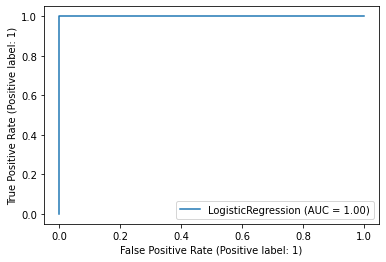

In [22]:
from sklearn.metrics import plot_roc_curve

svc_disp = plot_roc_curve(clf, X_test, y_test)
plt.show()

### Cross Validation

In [23]:
from sklearn.model_selection import cross_val_score

In [24]:
score = cross_val_score(clf, X, y, cv = 10, scoring="accuracy")
np.mean(score)
np.std(score)

0.0

In [25]:
score

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [26]:
import numpy as np
np.mean(score)

1.0

In [27]:
np.std(score)

0.0

### SVM 

In [28]:
from sklearn import svm

In [29]:
cl_svm = svm.SVC()
cl_svm.fit(X_train, y_train)

SVC()

In [30]:
svm_predict = clf.predict(X_test)

In [31]:
metrics.accuracy_score(svm_predict, y_test)

1.0

In [32]:
score = cross_val_score(cl_svm, X, y, cv = 10, scoring="accuracy")
print(np.mean(score))
print(np.std(score))

1.0
0.0


### Gradient Boosting

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

In [34]:
clf_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)

In [35]:
clf_gb.fit(X_test, y_test)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [36]:
gb_predict = clf_gb.predict(X_train)

In [37]:
metrics.accuracy_score(svm_predict, y_test)


1.0

In [38]:
score = cross_val_score(clf_gb, X, y, cv = 10, scoring="accuracy")
print(np.mean(score))
print(np.std(score))

1.0
0.0
